In [1]:
N = ord("D") % 3 + 1
print(N)

3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def read_column(file_name, column_name):
    data = pd.read_csv(file_name)
    return data[column_name].to_numpy()

apc_losses = read_column("russia_losses_equipment.csv", "APC")

daily_apc_losses = np.abs(np.diff(apc_losses))
print(daily_apc_losses)

[ 39  19  51  33  30  44  19  49  27  35  14  11  30  31  21  31  31  17
  32  44  27  38  42  52  40  12  40  30  52  38  39  13   3   6   8  20
  40  48  17  13  19   9  19   0   9  21  27  35  26  24  14  23  18  14
  19  17  11  21  32  25  21  26  15   7  12  35  24  17  17   5  13   9
   9   9  29   8  31  17  27   8  42  20  38   8  21  24  11  26  13  20
  17  46  15  19  12   9  36  15  32  24  23  17  11  19  40  16  18  11
  17  17  16  26  19  25  21   9  19  18  15  15  11  35  18  12  20  18
   6  29  26  21  11  32  13  26   9  20  40  16  18  22  33  12  22  22
  33  40  15  17  11  27  27  22  34  35  35  43  14  30  48  43  42  22
  40  32  35  19  14  34  23  27  33  29  21  39  16  20  14  15  14  12
  12   8  23  21  17   8  18  13  31  20  47  19  12  47  45  24  54  38
  73  18  18  29  17  20  20  27  21   9  24  25  28  19  37  16   9  35
  17  24  24  11  17  20  27  24  27  25  19  51  40  28  21  28  29  30
  44  14  16  37  16  15  37  35  70  36  34  53  1

In [7]:
top_5_losses = np.sort(daily_apc_losses)[-5:]
print(top_5_losses)

[ 91  96 110 120 190]


In [9]:
data = pd.read_csv('russia_losses_equipment.csv')
summer_2023_losses = np.abs(data[(data['date'] >= '2023-06-01') & (data['date'] <= '2023-08-31')]['APC'].diff().sum())
print(summer_2023_losses)

1126.0


In [11]:
recent_losses = apc_losses[-500:]  
average_losses = np.mean(recent_losses[-100:])  
print("Среднее значение уничтоженных БТР за последние 100 дней:", average_losses)

Среднее значение уничтоженных БТР за последние 100 дней: 2102.65


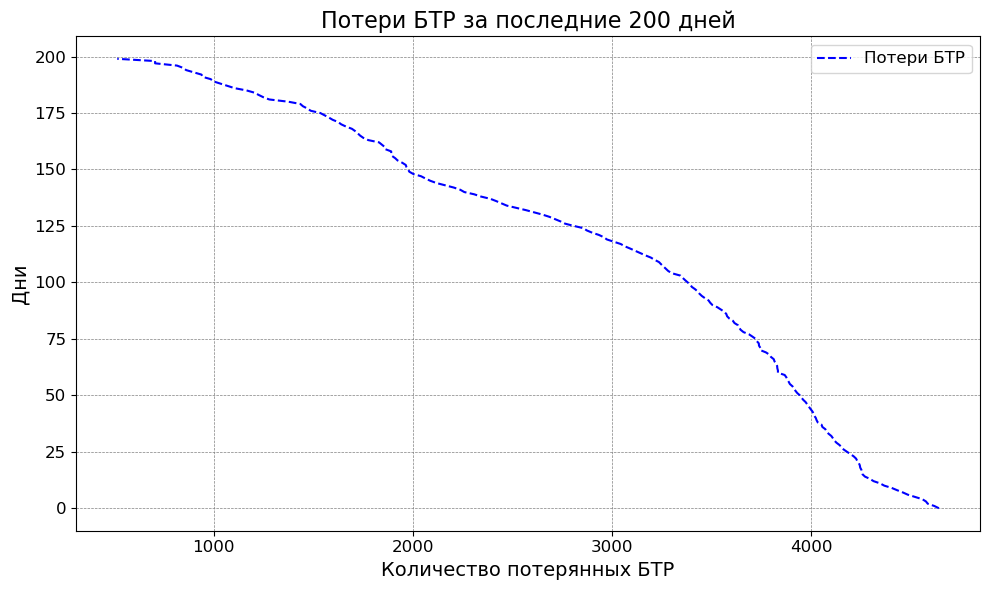

In [13]:
last_200_days = apc_losses[-200:] 

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(last_200_days, range(len(last_200_days)), linestyle='--', color='blue', label='Потери БТР')  
plt.title('Потери БТР за последние 200 дней', fontsize=16)
plt.ylabel('Дни', fontsize=14) 
plt.xlabel('Количество потерянных БТР', fontsize=14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  
plt.savefig('apc_losses_last_200_days.png', format='png') 
plt.show()  